# Day 43

## Decision Tree

- A decision tree is a type of algorithm used in machine learning and data mining. It's called a "tree" because it's designed in a branching structure, where each branch represents a possible decision or outcome based on certain conditions.
- In simple terms, a decision tree works like a flowchart. It takes in some input data and then uses a series of "if-then" statements to arrive at a decision or prediction. The algorithm recursively partitions the data into subsets based on the values of one or more input features, creating a tree-like model of decisions and their possible consequences.

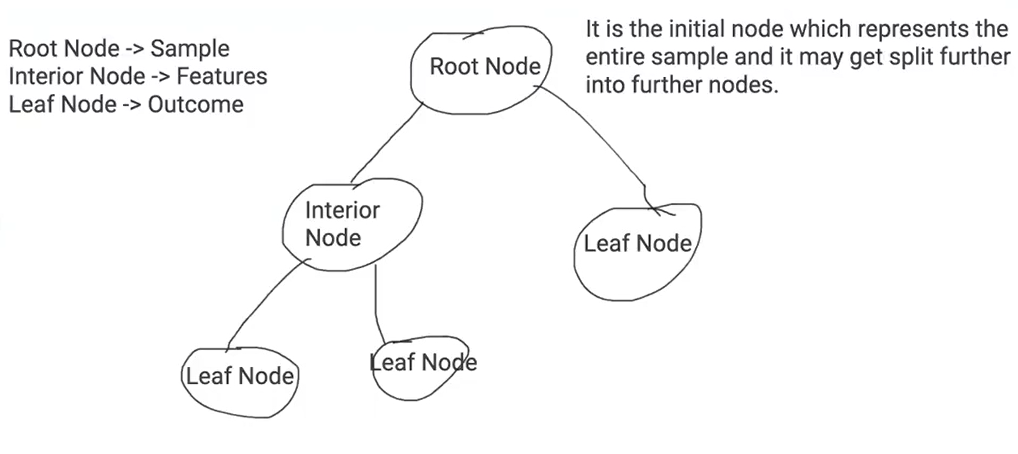
- Example:

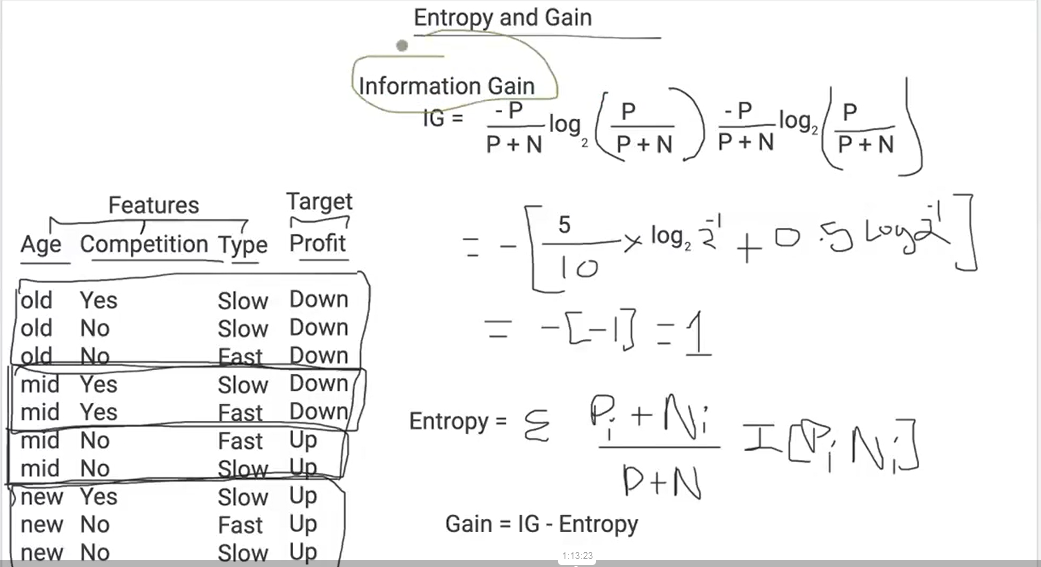
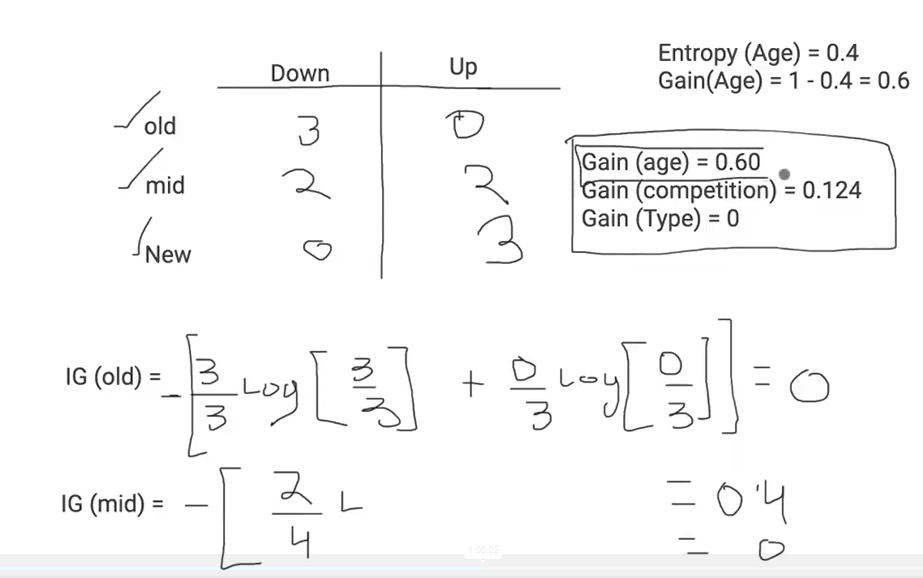
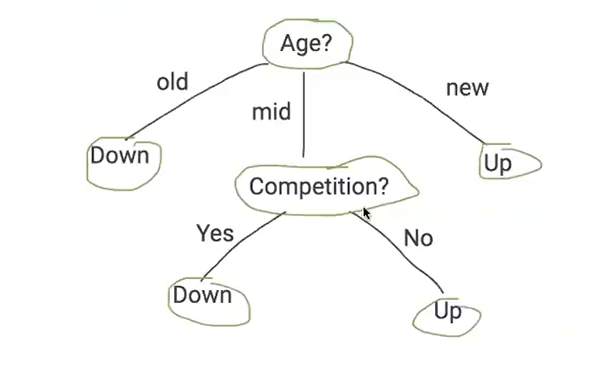

## Small Project

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

### Problem Statement
- In this data, we have one independent variable "Temperature" and one Dependent variable "Revenue". 
- You have to build a DecesionTreeRegressor First to study the relationship b/w the two variable of the Ice Cream Shop and then predict the revenue of the Ice Cream Shop based on the temperature on a perticular day.

### Import the Datasets

- Link: https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [123]:
df = pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv")

In [124]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [125]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [126]:
print(f"The total numbers of rows and columns detaset contain are {df.shape}")

The total numbers of rows and columns detaset contain are (500, 2)


In [127]:
# Describing the stastical information
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [128]:
# Checking the detail information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [129]:
# Checking the Null values.
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [130]:
# Finding out the relationship of features and Targets
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


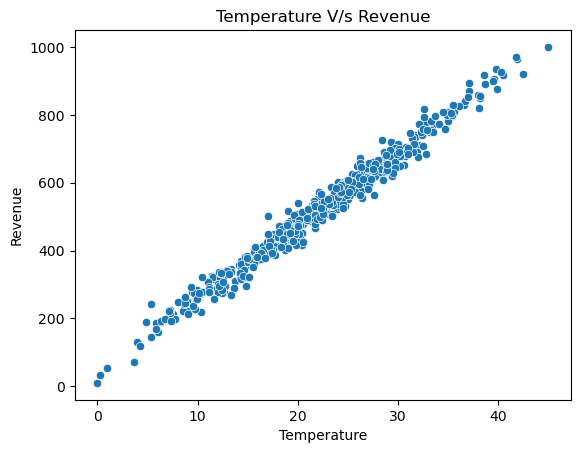

In [131]:
sns.scatterplot(df.Temperature, df.Revenue);
plt.title("Temperature V/s Revenue");

<AxesSubplot:>

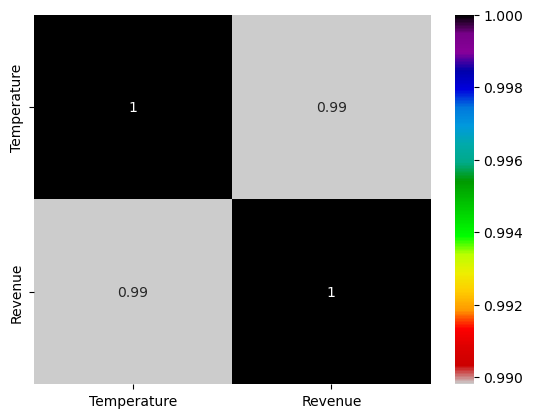

In [132]:
sns.heatmap(df.corr(), annot= True, cmap="nipy_spectral_r")

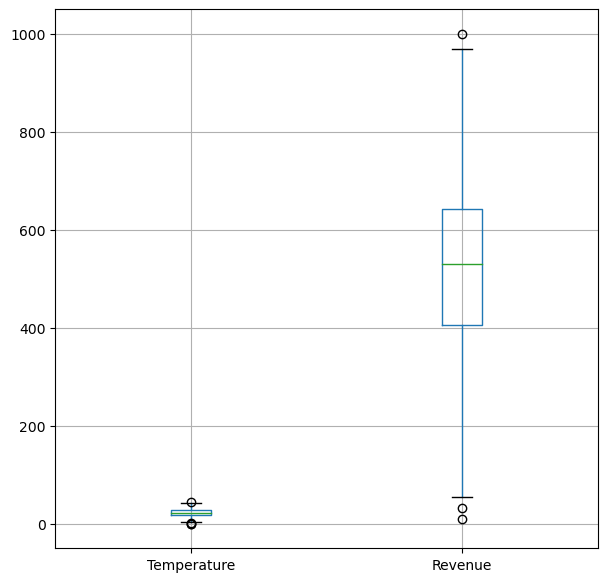

In [133]:
# To find out the Outliers 
plt.figure(figsize=(7,7))
df.boxplot();

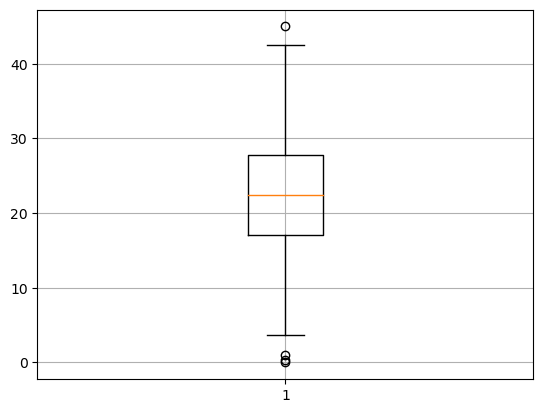

In [134]:
plt.boxplot(df.Temperature);
plt.grid()

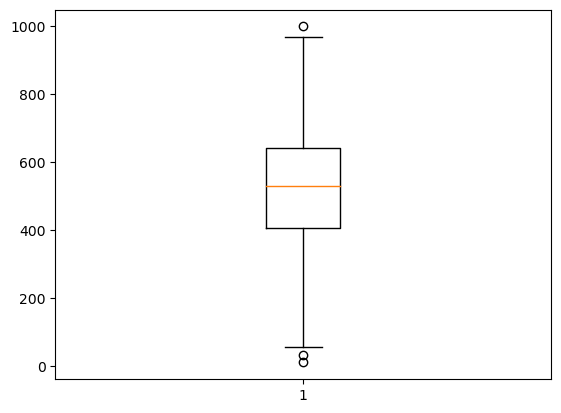

In [135]:
plt.boxplot(df.Revenue);

### Spliting of dat - Training and Testing Set

In [136]:
X = np.array(df.Temperature.values)
y = np.array(df.Revenue.values)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [138]:
print(f"The length of X in X_train: {X_train.shape} and in y_train: {y_train.shape}")
print(f"The length of y in X_test: {X_test.shape} and in y_test: {y_test.shape}")

The length of X in X_train: (400,) and in y_train: (400,)
The length of y in X_test: (100,) and in y_test: (100,)


### Choosing the model

In [139]:
model = DecisionTreeRegressor()

### Training the Model

In [140]:
model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

In [141]:
# to find out the best m=parametes for hyper tuning the model
# model.best_params_

### Testing the Model

In [142]:
y_pred = model.predict(X_test.reshape(-1,1))

In [143]:
y_pred

array([501.34533   , 682.7528689 , 633.5040087 , 474.7493924 ,
       698.9718063 , 726.2337713 , 534.6228653 , 530.7482251 ,
       552.8193512 , 648.2099977 , 782.0125497 , 659.8732869 ,
       535.8667293 , 381.5641352 , 427.1383693 , 186.4764868 ,
       444.8268017 , 319.4029032 , 651.5043041 , 501.7329901 ,
       706.7246037 , 639.5380115 , 819.1175879 , 539.5277397 ,
       648.5546445 , 711.1740653 , 477.8417185 , 563.3816326 ,
       690.7892959 , 905.4776043 , 473.6043349 , 335.8156867 ,
       448.3259814 , 563.3816326 , 420.9664529 , 416.8486183 ,
       649.729072  , 594.1103517 , 361.1191443 , 545.9039291 ,
       697.8339862 , 530.7482251 , 406.5792487 , 444.8268017 ,
       279.866148  , 828.2960767 , 685.6546554 , 237.7639106 ,
       191.6233119 , 278.7319615 , 690.7892959 , 488.1708088 ,
       583.7597813 , 450.4732071 , 969.2916296 , 322.9839774 ,
       334.4337199 , 256.772593  , 702.6236136 , 451.4507843 ,
       651.5043041 , 587.2212461 , 491.2306027 , 870.76

### Comparing the y_test with the y_pred

In [144]:
comp = pd.DataFrame({"Actual Values": y_test,"Predicted Values": y_pred})

In [145]:
comp

,Actual Values,Predicted Values
0,506.432135,501.345330
1,629.893792,682.752869
2,653.986736,633.504009
3,437.251993,474.749392
4,691.855484,698.971806
...,...,...
95,241.278548,221.223291
96,474.832244,463.065614
97,410.860905,463.480508
98,483.333078,506.222379


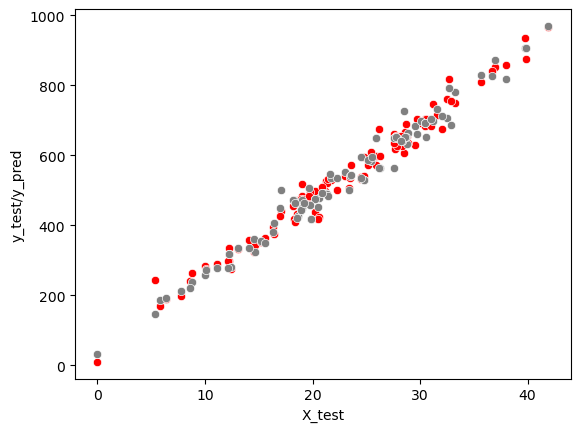

In [146]:
sns.scatterplot(X_test, y_test, color="red");
sns.scatterplot(X_test, y_pred, color="gray");
plt.xlabel("X_test")
plt.ylabel('y_test/y_pred');


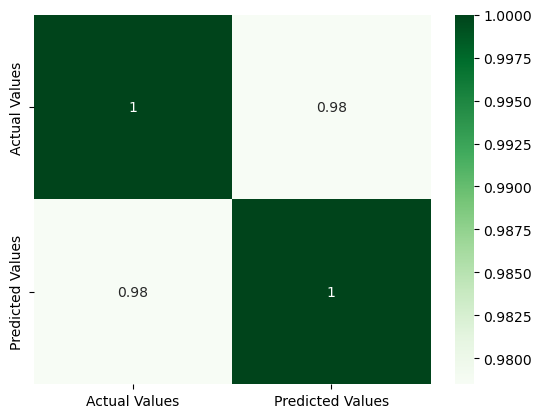

In [147]:
# Find out the relationship in the Visualisation manner of y_test and y_pred
sns.heatmap(comp.corr(), annot=True, cmap = 'Greens');

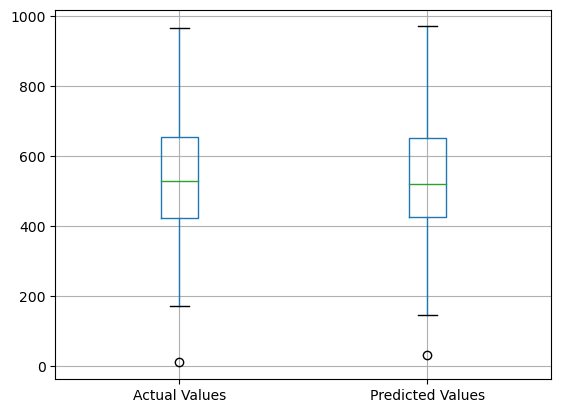

In [148]:
# To find out the Outliers 
comp.boxplot();

### Performance

In [149]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [150]:
r2 = r2_score(y_test, y_pred)
print(f"The accuracy of our model is {r2}") 

The accuracy of our model is 0.956216057467083


* We can only say our model is accuarte when we are comparing more than one model together, then only we can say that we have choosen the perfect model.

In [151]:
mean_absolute_error(y_test, y_pred)

29.2853001702

In [152]:
mean_squared_error(y_test, y_pred)

1406.7595224525933